# 📊 IoT Dataset – EDA Notebook

In [172]:

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# --- Load Dataset ---

In [173]:

df = pd.read_csv('../data/smart_manufacturing_data.csv')  # Adjust path if needed
print("Shape:", df.shape)
df.head()



Shape: (100000, 13)


,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


In [174]:
print(df['failure_type'].unique())

['Normal' 'Vibration Issue' 'Overheating' 'Pressure Drop'
 'Electrical Fault']


In [175]:

if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

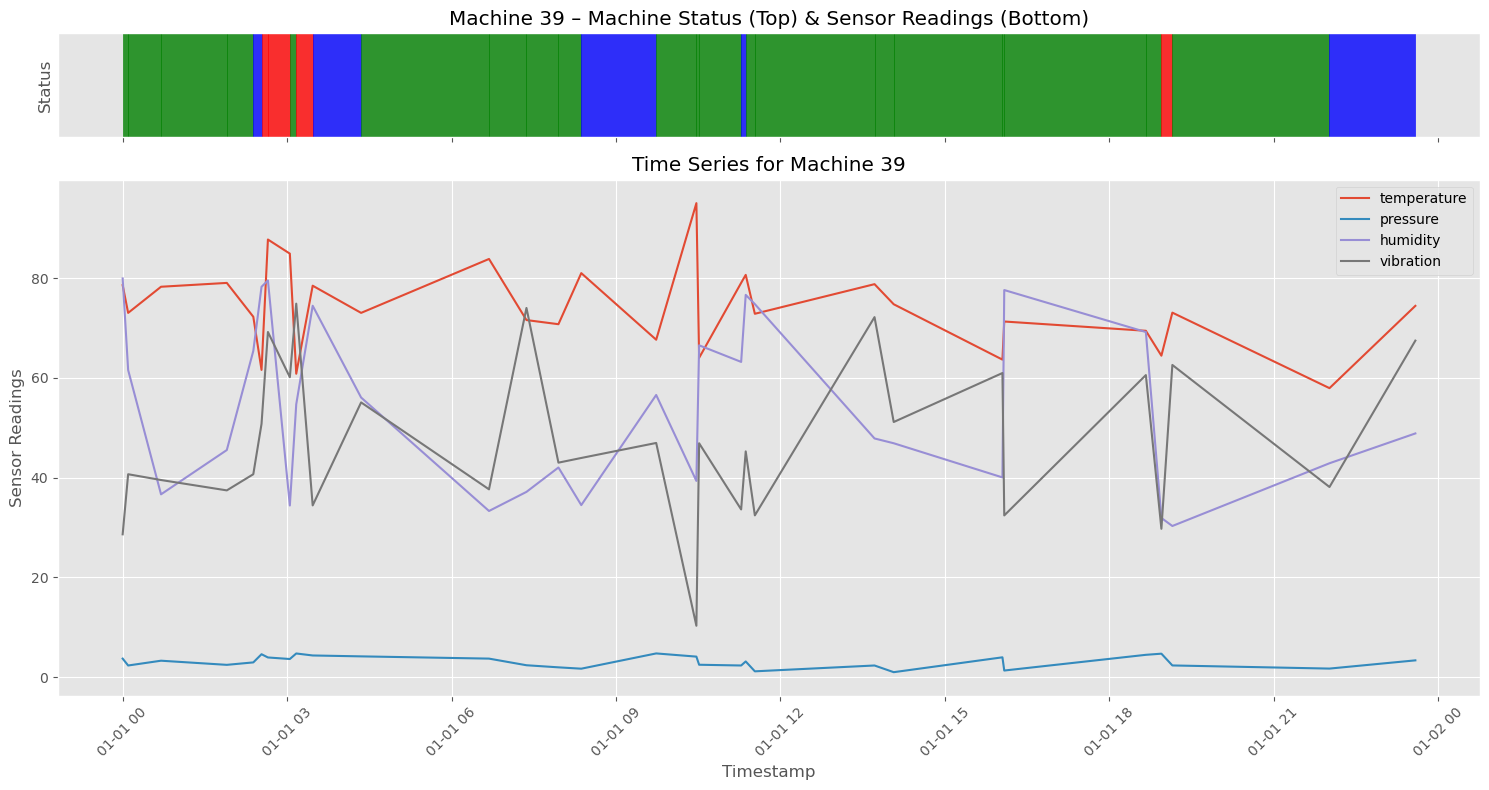

In [176]:
# Choose a specific machine to explore
machine_id = 39  # Change

# Filter data for this machine
machine_df = df[df['machine_id'] == machine_id]

# Narrow down to a specific date/time range
zoomed_df = machine_df.loc[(machine_df.index >= '2025-01-01') &
                           (machine_df.index <= '2025-01-02')]
# Define colors for each status
status_colors = {0: 'blue', 1: 'green', 2: 'red'} # status_colors[status]

# Define colors for each maintenance required
maintenance_colors = {0: 'green', 1: 'red'} # maintenance_colors[maintenance_require]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True,
                       gridspec_kw={'height_ratios': [0.2, 1]})  # Top = status, bottom = metrics

# --- 1. STATUS STRIPE ---
for i in range(len(zoomed_df) - 1):
    start = zoomed_df.index[i]
    end = zoomed_df.index[i + 1]
    status = zoomed_df['machine_status'].iloc[i]
    ax[0].axvspan(start, end, color=status_colors[status], alpha=0.8)
    
    

ax[0].set_yticks([])
ax[0].set_ylabel('Status')
ax[0].set_title(f'Machine {machine_id} – Machine Status (Top) & Sensor Readings (Bottom)')
ax[0].grid(False)

# --- 2. SENSOR READINGS ---
# Plot

for i, feature in enumerate(['temperature', 'pressure', 'humidity', 'vibration']):#, 'energy_consumption'
    ax[1].plot(zoomed_df.index, zoomed_df[feature], label=feature)

plt.title(f"Time Series for Machine {machine_id}")
plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
# --- Basic Info ---
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2025-01-01 00:00:00 to 2025-03-11 10:39:00
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   machine_id                100000 non-null  int64  
 1   temperature               100000 non-null  float64
 2   vibration                 100000 non-null  float64
 3   humidity                  100000 non-null  float64
 4   pressure                  100000 non-null  float64
 5   energy_consumption        100000 non-null  float64
 6   machine_status            100000 non-null  int64  
 7   anomaly_flag              100000 non-null  int64  
 8   predicted_remaining_life  100000 non-null  int64  
 9   failure_type              100000 non-null  object 
 10  downtime_risk             100000 non-null  float64
 11  maintenance_required      100000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 9.9+ MB


,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,downtime_risk,maintenance_required
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.499330,75.015625,50.012270,54.995401,3.000405,2.747064,1.002050,0.089160,234.269160,0.089155,0.196970
std,14.389439,10.031884,14.985444,14.437960,1.152399,1.297865,0.446193,0.284976,150.063062,0.284961,0.397711
min,1.000000,35.550000,-17.090000,30.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,13.000000,68.267500,39.970000,42.520000,2.000000,1.630000,1.000000,0.000000,97.000000,0.000000,0.000000
50%,25.000000,75.060000,49.960000,54.980000,3.010000,2.740000,1.000000,0.000000,230.000000,0.000000,0.000000
75%,38.000000,81.750000,60.100000,67.500000,4.000000,3.870000,1.000000,0.000000,365.000000,0.000000,0.000000
max,50.000000,121.940000,113.800000,80.000000,5.000000,5.000000,2.000000,1.000000,499.000000,1.000000,1.000000


In [178]:
# --- Check for Missing Values ---
print("\nMissing values:")
print(df.isnull().sum())




Missing values:
machine_id                  0
temperature                 0
vibration                   0
humidity                    0
pressure                    0
energy_consumption          0
machine_status              0
anomaly_flag                0
predicted_remaining_life    0
failure_type                0
downtime_risk               0
maintenance_required        0
dtype: int64


In [179]:
# --- Class Balance (e.g., status column) ---
if 'machine_status' in df.columns:
    print("\nClass distribution:")
    print(df['machine_status'].value_counts())




Class distribution:
machine_status
1    80091
2    10057
0     9852
Name: count, dtype: int64


In [180]:
# --- Timestamp Check (optional) ---
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)



In [181]:
# 🧠 IoT Failure & Maintenance Analysis – Notebook Template
# Author: [Your Name]
# Project: Smart Manufacturing EDA

# === 0. Setup ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional display settings
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# === 2. Basic Overview ===
print("🔹 Shape:", df.shape)
print("🔹 Columns:", df.columns.tolist())
print("🔹 Sample:")
display(df.head())



🔹 Shape: (100000, 12)
🔹 Columns: ['machine_id', 'temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption', 'machine_status', 'anomaly_flag', 'predicted_remaining_life', 'failure_type', 'downtime_risk', 'maintenance_required']
🔹 Sample:


,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
timestamp,,,,,,,,,,,,
2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


In [182]:
display(df[['predicted_remaining_life','maintenance_required']])
display(df[(df['machine_id'] == 2) & (df['maintenance_required'] == 1)& (df['anomaly_flag'] ==1)][['predicted_remaining_life','maintenance_required','anomaly_flag','downtime_risk','machine_status','failure_type']])
display(df[(df['machine_id'] == 2) & (df['predicted_remaining_life'] < 50)][['predicted_remaining_life','maintenance_required','anomaly_flag','downtime_risk','machine_status','failure_type']])

,predicted_remaining_life,maintenance_required
timestamp,,
2025-01-01 00:00:00,106,0
2025-01-01 00:01:00,320,0
2025-01-01 00:02:00,19,1
2025-01-01 00:03:00,10,1
2025-01-01 00:04:00,65,1
...,...,...
2025-03-11 10:35:00,313,0
2025-03-11 10:36:00,439,0
2025-03-11 10:37:00,30,1


,predicted_remaining_life,maintenance_required,anomaly_flag,downtime_risk,machine_status,failure_type
timestamp,,,,,,
2025-01-01 00:17:00,43,1,1,1.0,1,Normal
2025-01-01 21:51:00,28,1,1,1.0,1,Normal
2025-01-01 23:04:00,35,1,1,1.0,1,Normal
2025-01-02 14:32:00,3,1,1,1.0,1,Normal
2025-01-02 17:52:00,24,1,1,1.0,1,Normal
...,...,...,...,...,...,...
2025-03-09 05:58:00,13,1,1,1.0,1,Normal
2025-03-09 06:54:00,21,1,1,1.0,2,Pressure Drop
2025-03-09 08:40:00,13,1,1,1.0,1,Normal


,predicted_remaining_life,maintenance_required,anomaly_flag,downtime_risk,machine_status,failure_type
timestamp,,,,,,
2025-01-01 00:17:00,43,1,1,1.0,1,Normal
2025-01-01 04:39:00,47,0,0,0.0,1,Normal
2025-01-01 05:13:00,27,0,0,0.0,1,Normal
2025-01-01 12:45:00,27,0,0,0.0,0,Normal
2025-01-01 15:43:00,12,1,0,0.0,1,Normal
...,...,...,...,...,...,...
2025-03-09 08:40:00,13,1,1,1.0,1,Normal
2025-03-10 01:56:00,41,0,0,0.0,0,Normal
2025-03-10 07:10:00,18,1,1,1.0,1,Normal


In [183]:
# === 3. Failures & Maintenance Overview ===
print("🔸 Failure Types:")
display(df['failure_type'].value_counts())

print("🔸 Maintenance Needed (%):", sum(df[df['maintenance_required'] == 1].maintenance_required)/100000)
# === 3.1. Downtime risks ===
print("🔸 Downtime risks:")
display(df['downtime_risk'].value_counts())


# Group summary
summary = df.groupby('failure_type')[['temperature', 'vibration', 'energy_consumption','pressure','maintenance_required','anomaly_flag']].mean()
display(summary)

# Group summary
summary = df.groupby('machine_status')[['temperature', 'vibration', 'energy_consumption','pressure','maintenance_required','anomaly_flag']].mean()
display(summary)


🔸 Failure Types:


failure_type
Normal              91899
Vibration Issue      3129
Overheating          1989
Pressure Drop        1969
Electrical Fault     1014
Name: count, dtype: int64

🔸 Maintenance Needed (%): 0.19697
🔸 Downtime risks:


downtime_risk
0.00    91084
1.00     8904
0.98        3
0.99        3
0.97        2
0.92        1
0.94        1
0.88        1
0.93        1
Name: count, dtype: int64

,temperature,vibration,energy_consumption,pressure,maintenance_required,anomaly_flag
failure_type,,,,,,
Electrical Fault,75.441785,48.957771,2.795434,2.986963,1.000000,0.098619
Normal,75.004488,50.023544,2.747437,3.000860,0.126182,0.088782
Overheating,74.686662,49.818864,2.751071,2.980930,1.000000,0.087984
Pressure Drop,75.272773,49.880696,2.704109,2.966887,1.000000,0.096496
Vibration Issue,75.251914,50.228626,2.744928,3.024874,1.000000,0.093321


,temperature,vibration,energy_consumption,pressure,maintenance_required,anomaly_flag
machine_status,,,,,,
0,75.103376,49.770001,2.764162,2.995538,0.109216,0.090438
1,74.996786,50.048603,2.746072,3.001517,0.106928,0.088662
2,75.079691,49.960253,2.738215,2.996315,1.000000,0.091876


,predicted_remaining_life,maintenance_required,anomaly_flag,downtime_risk,machine_status,failure_type
timestamp,,,,,,
2025-01-01 00:17:00,43,1,1,1.0,1,Normal
2025-01-01 21:51:00,28,1,1,1.0,1,Normal
2025-01-01 23:04:00,35,1,1,1.0,1,Normal
2025-01-02 14:32:00,3,1,1,1.0,1,Normal
2025-01-02 17:52:00,24,1,1,1.0,1,Normal
...,...,...,...,...,...,...
2025-03-09 05:58:00,13,1,1,1.0,1,Normal
2025-03-09 06:54:00,21,1,1,1.0,2,Pressure Drop
2025-03-09 08:40:00,13,1,1,1.0,1,Normal


/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3662407935.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoomed_df[f'{col}_roll'] = zoomed_df[col].rolling(window=10).mean()
/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3662407935.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoomed_df[f'{col}_roll'] = zoomed_df[col].rolling(window=10).mean()
/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3662407935.py:24: SettingWithCopyWarning: 
A value is

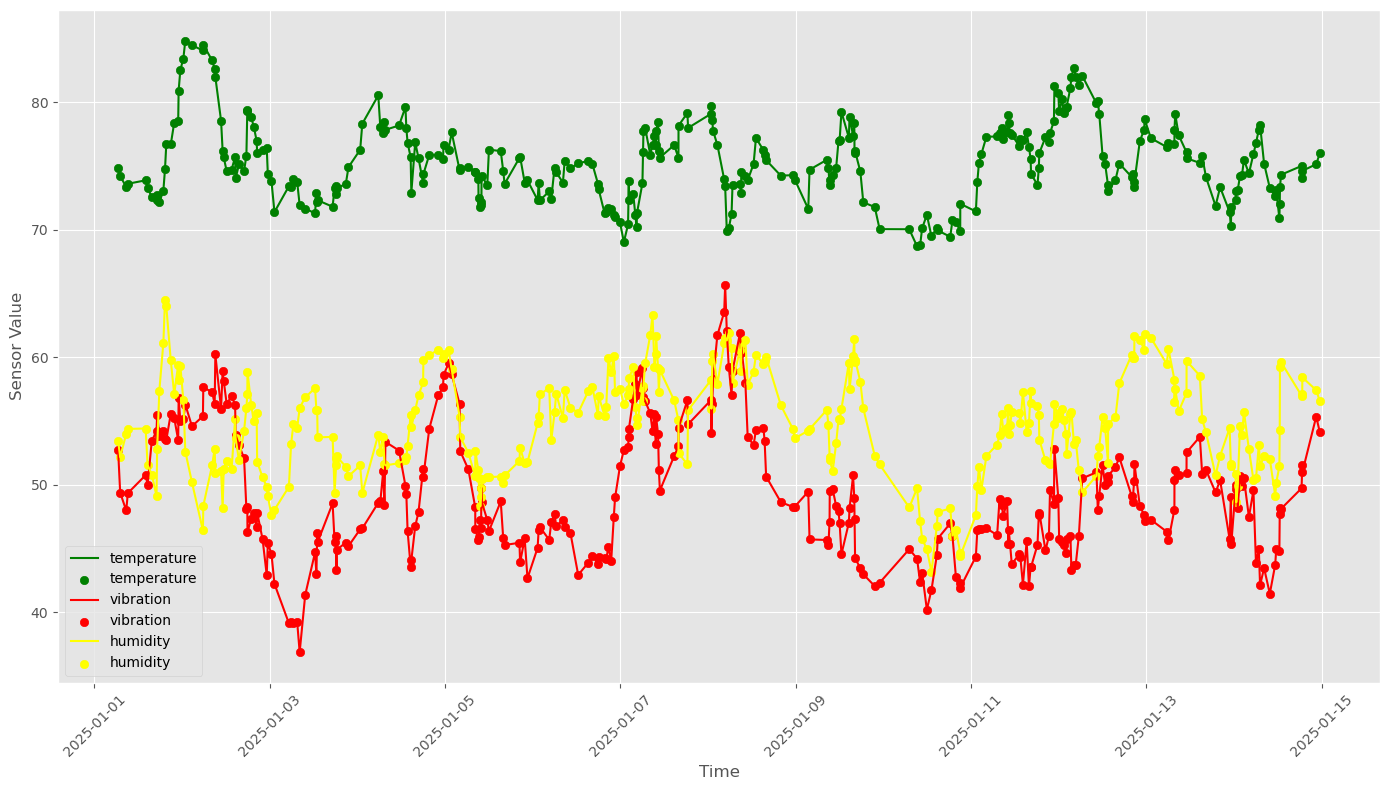

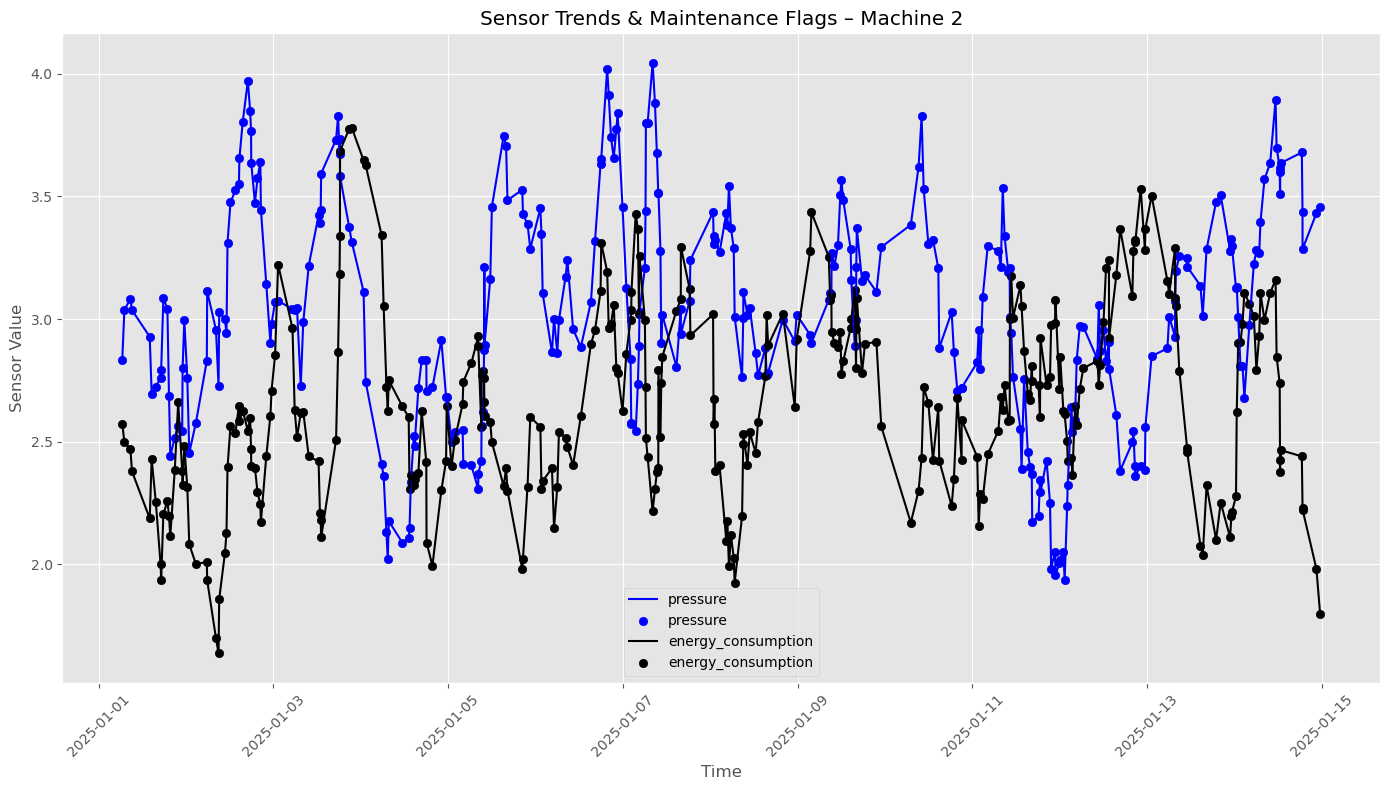

In [199]:
# === 4. Plot Sensor Trends for a Machine ===
# MAchine 1, Firsrt moth, figure the connection between temerature, vibration and humidity vs Total Failures and specifically Vibration Issues
machine_id = 2  # ⬅️ Change this for other machines

machine_df= df[
    (df['machine_id'] == machine_id) &
    (df['machine_status'] == 1)
].copy()
machine_df_ = df[
    (df['machine_id'] == machine_id) &
    (df['maintenance_required'] == 1) &
    (df['anomaly_flag'] == 1) &
    (df['machine_status'] == 0)
].copy()
display(df[(df['machine_id'] == machine_id) & (df['maintenance_required'] == 1)& (df['anomaly_flag'] ==1)][['predicted_remaining_life','maintenance_required','anomaly_flag','downtime_risk','machine_status','failure_type']])

# Narrow down to a specific date/time range
zoomed_df = machine_df.loc[(machine_df.index >= '2025-01-01') &
                           (machine_df.index <= '2025-01-15')]
#zoomed_df_all = machine_df_all.loc[(machine_df_all.index >= '2025-01-01') &
#                           (machine_df_all.index <= '2025-01-15')]
# Rolling averages
for col in ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']:
    zoomed_df[f'{col}_roll'] = zoomed_df[col].rolling(window=10).mean()
    #zoomed_df_all[f'{col}_roll'] = zoomed_df_all[col].rolling(window=5).mean()
colors = {
    'temperature_roll': 'green',
    'vibration_roll': 'red',
    'humidity_roll': 'yellow',
    'pressure_roll': 'blue',
    'energy_consumption_roll': 'black'
}
# Plot with maintenance flags
plt.figure(figsize=(14, 8))
for col in ['temperature_roll', 'vibration_roll', 'humidity_roll']:
    plt.plot(zoomed_df.index, zoomed_df[col], label=col.replace('_roll', ''),color=colors[col])
    plt.scatter(zoomed_df.index, zoomed_df[col], label=col.replace('_roll', ''),color=colors[col])
    
for ts in zoomed_df[zoomed_df['failure_type'] == 'Overheating'].index:
    plt.axvline(ts, color='green', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Vibration Issue'].index:
    plt.axvline(ts, color='red', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Pressure Drop'].index:
    plt.axvline(ts, color='blue', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Electrical Fault'].index:
    plt.axvline(ts, color='black', linestyle='--', alpha=0.2)
    
#for ts in zoomed_df[zoomed_df['machine_status'] == 2].index:
#    plt.axvline(ts, color='orange', linestyle='-', alpha=0.2)

#plt.title(f"Sensor Trends & Maintenance Flags – Machine {machine_id} Firsrt moth, figure the connection between temerature, vibration and humidity vs Total Failures and specifically Vibration Issues")

plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot with maintenance flags
plt.figure(figsize=(14, 8))
for col in [ 'pressure_roll', 'energy_consumption_roll']:
    plt.plot(zoomed_df.index, zoomed_df[col], label=col.replace('_roll', ''),color=colors[col])
    plt.scatter(zoomed_df.index, zoomed_df[col], label=col.replace('_roll', ''),color=colors[col])
    

for ts in zoomed_df[zoomed_df['failure_type'] == 'Overheating'].index:
    plt.axvline(ts, color='green', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Vibration Issue'].index:
    plt.axvline(ts, color='red', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Pressure Drop'].index:
    plt.axvline(ts, color='blue', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Electrical Fault'].index:
    plt.axvline(ts, color='black', linestyle='--', alpha=0.2)
#for ts in zoomed_df[zoomed_df['machine_status'] == 2].index:
#    plt.axvline(ts, color='orange', linestyle='-', alpha=0.2)

plt.title(f"Sensor Trends & Maintenance Flags – Machine {machine_id}")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




,predicted_remaining_life,maintenance_required,anomaly_flag,downtime_risk,machine_status,failure_type
timestamp,,,,,,
2025-01-01 00:17:00,43,1,1,1.0,1,Normal
2025-01-01 21:51:00,28,1,1,1.0,1,Normal
2025-01-01 23:04:00,35,1,1,1.0,1,Normal
2025-01-02 14:32:00,3,1,1,1.0,1,Normal
2025-01-02 17:52:00,24,1,1,1.0,1,Normal
...,...,...,...,...,...,...
2025-03-09 05:58:00,13,1,1,1.0,1,Normal
2025-03-09 06:54:00,21,1,1,1.0,2,Pressure Drop
2025-03-09 08:40:00,13,1,1,1.0,1,Normal


/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3576353491.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoomed_df_[f'{col}_roll'] = zoomed_df_[col].rolling(window=10).mean()
/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3576353491.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoomed_df_[f'{col}_roll'] = zoomed_df_[col].rolling(window=10).mean()
/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3576353491.py:26: SettingWithCopyWarning: 
A valu

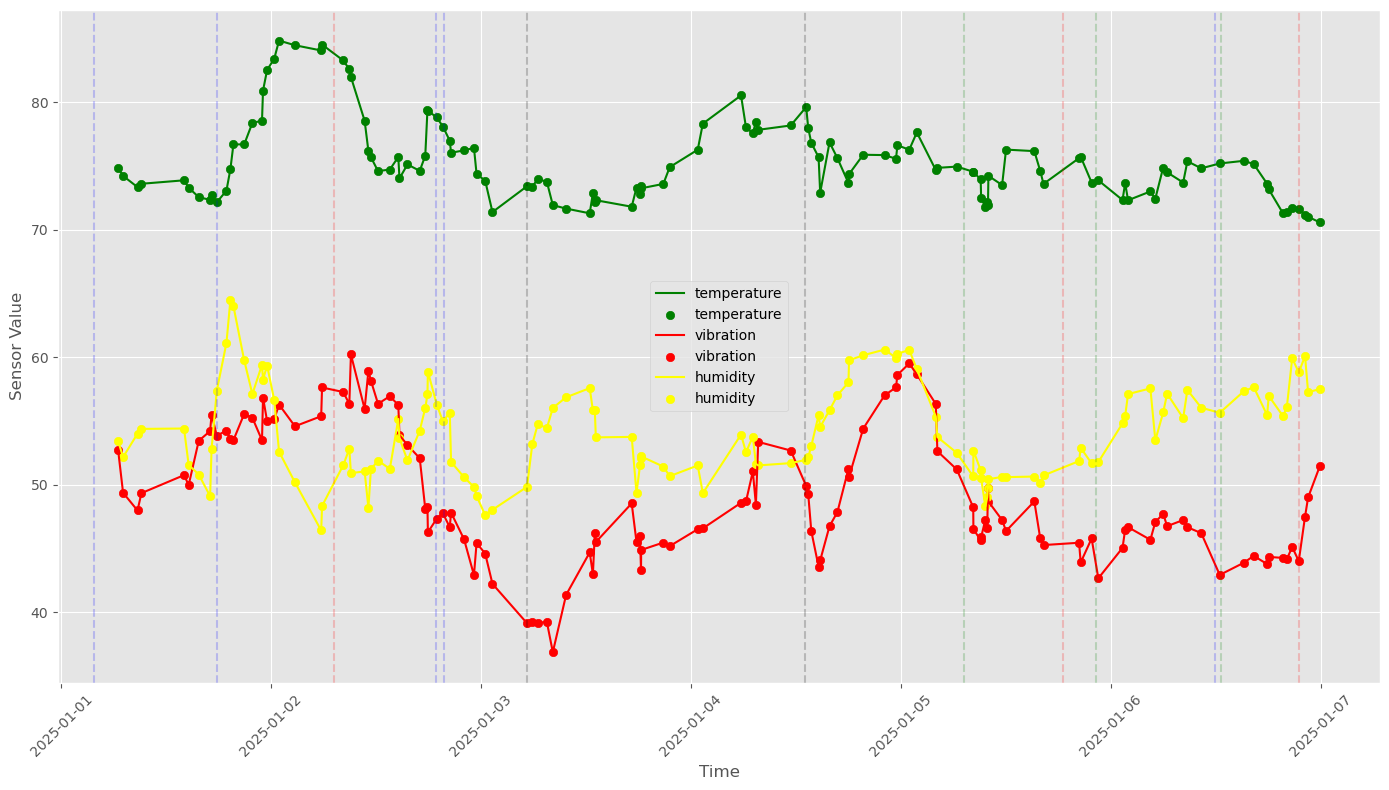

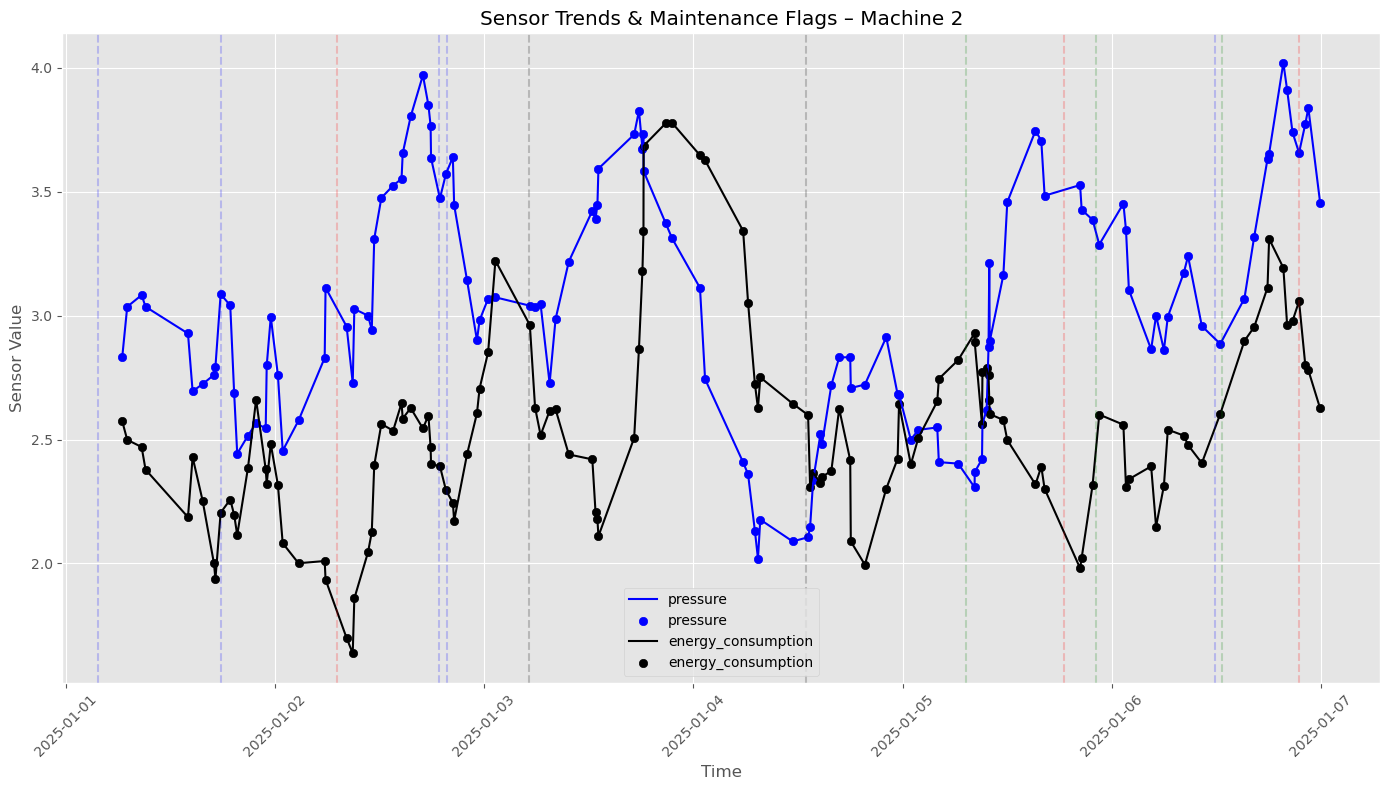

In [203]:
# === 4. Plot Sensor Trends for a Machine ===
# MAchine 1, Firsrt moth, figure the connection between temerature, vibration and humidity vs Total Failures and specifically Vibration Issues
machine_id = 2  # ⬅️ Change this for other machines

machine_df= df[
    (df['machine_id'] == machine_id) &
    (df['machine_status'] == 2)
].copy()
machine_df_ = df[
    (df['machine_id'] == machine_id) &
   # (df['maintenance_required'] == 1) &
    #(df['anomaly_flag'] == 1) &
    (df['machine_status'] == 1)
].copy()
display(df[(df['machine_id'] == machine_id) & (df['maintenance_required'] == 1)& (df['anomaly_flag'] ==1)][['predicted_remaining_life','maintenance_required','anomaly_flag','downtime_risk','machine_status','failure_type']])

# Narrow down to a specific date/time range
zoomed_df = machine_df.loc[(machine_df.index >= '2025-01-01') &
                           (machine_df.index <= '2025-01-07')]
zoomed_df_ = machine_df_.loc[(machine_df_.index >= '2025-01-01') &
                           (machine_df_.index <= '2025-01-07')]
#zoomed_df_all = machine_df_all.loc[(machine_df_all.index >= '2025-01-01') &
#                           (machine_df_all.index <= '2025-01-15')]
# Rolling averages
for col in ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']:
    zoomed_df_[f'{col}_roll'] = zoomed_df_[col].rolling(window=10).mean()
    #zoomed_df_all[f'{col}_roll'] = zoomed_df_all[col].rolling(window=5).mean()
colors = {
    'temperature_roll': 'green',
    'vibration_roll': 'red',
    'humidity_roll': 'yellow',
    'pressure_roll': 'blue',
    'energy_consumption_roll': 'black'
}
# Plot with maintenance flags
plt.figure(figsize=(14, 8))
for col in ['temperature_roll', 'vibration_roll', 'humidity_roll']:
    plt.plot(zoomed_df_.index, zoomed_df_[col], label=col.replace('_roll', ''),color=colors[col])
    plt.scatter(zoomed_df_.index, zoomed_df_[col], label=col.replace('_roll', ''),color=colors[col])
    
for ts in zoomed_df[zoomed_df['failure_type'] == 'Overheating'].index:
    plt.axvline(ts, color='green', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Vibration Issue'].index:
    plt.axvline(ts, color='red', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Pressure Drop'].index:
    plt.axvline(ts, color='blue', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Electrical Fault'].index:
    plt.axvline(ts, color='black', linestyle='--', alpha=0.2)
    
#for ts in zoomed_df[zoomed_df['machine_status'] == 2].index:
#    plt.axvline(ts, color='orange', linestyle='-', alpha=0.2)

#plt.title(f"Sensor Trends & Maintenance Flags – Machine {machine_id} Firsrt moth, figure the connection between temerature, vibration and humidity vs Total Failures and specifically Vibration Issues")

plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot with maintenance flags
plt.figure(figsize=(14, 8))
for col in [ 'pressure_roll', 'energy_consumption_roll']:
    plt.plot(zoomed_df_.index, zoomed_df_[col], label=col.replace('_roll', ''),color=colors[col])
    plt.scatter(zoomed_df_.index, zoomed_df_[col], label=col.replace('_roll', ''),color=colors[col])
    

for ts in zoomed_df[zoomed_df['failure_type'] == 'Overheating'].index:
    plt.axvline(ts, color='green', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Vibration Issue'].index:
    plt.axvline(ts, color='red', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Pressure Drop'].index:
    plt.axvline(ts, color='blue', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Electrical Fault'].index:
    plt.axvline(ts, color='black', linestyle='--', alpha=0.2)
#for ts in zoomed_df[zoomed_df['machine_status'] == 2].index:
#    plt.axvline(ts, color='orange', linestyle='-', alpha=0.2)

plt.title(f"Sensor Trends & Maintenance Flags – Machine {machine_id}")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3799667625.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoomed_df[f'{col}_roll'] = zoomed_df[col].rolling(window=10).mean()
/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3799667625.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoomed_df[f'{col}_roll'] = zoomed_df[col].rolling(window=10).mean()
/var/folders/2m/j1fnwpfs5rqb5_t22m137rym0000gn/T/ipykernel_66384/3799667625.py:9: SettingWithCopyWarning: 
A value is tr

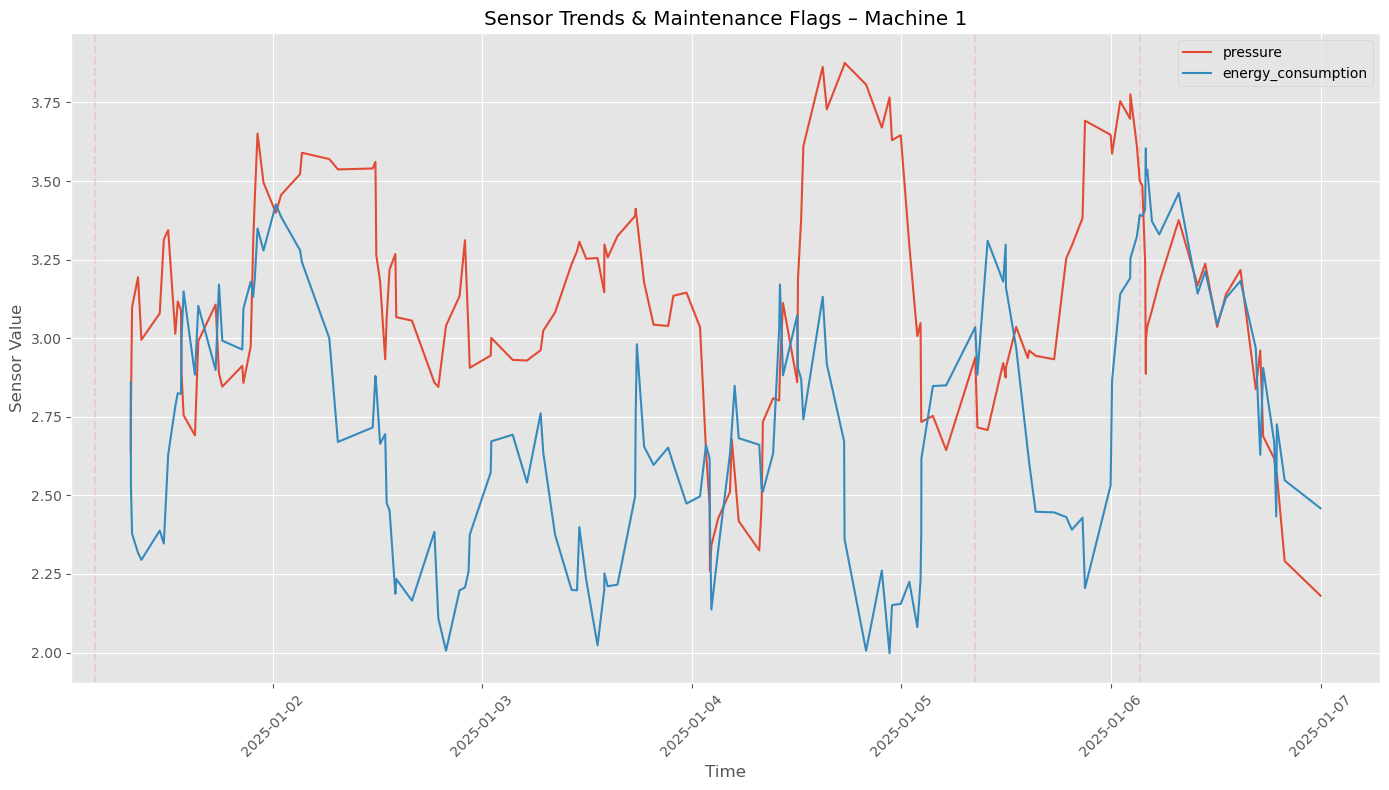

In [105]:
# === 4. Plot Sensor Trends for a Machine ===
machine_id = 1  # ⬅️ Change this for other machines
machine_df = df[df['machine_id'] == machine_id].copy()
# Narrow down to a specific date/time range
zoomed_df = machine_df.loc[(machine_df.index >= '2025-01-01') &
                           (machine_df.index <= '2025-01-07')]
# Rolling averages
for col in ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']:
    zoomed_df[f'{col}_roll'] = zoomed_df[col].rolling(window=10).mean()

# Plot with maintenance flags
plt.figure(figsize=(14, 8))
for col in [ 'pressure_roll', 'energy_consumption_roll']:
    plt.plot(zoomed_df.index, zoomed_df[col], label=col.replace('_roll', ''))
    
# Mark maintenance
#failure_type
#Normal              91899
#Vibration Issue      3129
#Overheating          1989
#Pressure Drop        1969
#Electrical Fault     1014

#for ts in machine_df[machine_df['maintenance_required'] == 1].index:
#for ts in zoomed_df[zoomed_df['failure_type'] != 'Normal'].index:
#    plt.axvline(ts, color='white', linestyle='--', alpha=0.1)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Overheating'].index:
    plt.axvline(ts, color='green', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Vibration Issue'].index:
    plt.axvline(ts, color='red', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Pressure Drop'].index:
    plt.axvline(ts, color='blue', linestyle='--', alpha=0.2)
for ts in zoomed_df[zoomed_df['failure_type'] == 'Electrical Fault'].index:
    plt.axvline(ts, color='purple', linestyle='--', alpha=0.2)

plt.title(f"Sensor Trends & Maintenance Flags – Machine {machine_id}")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



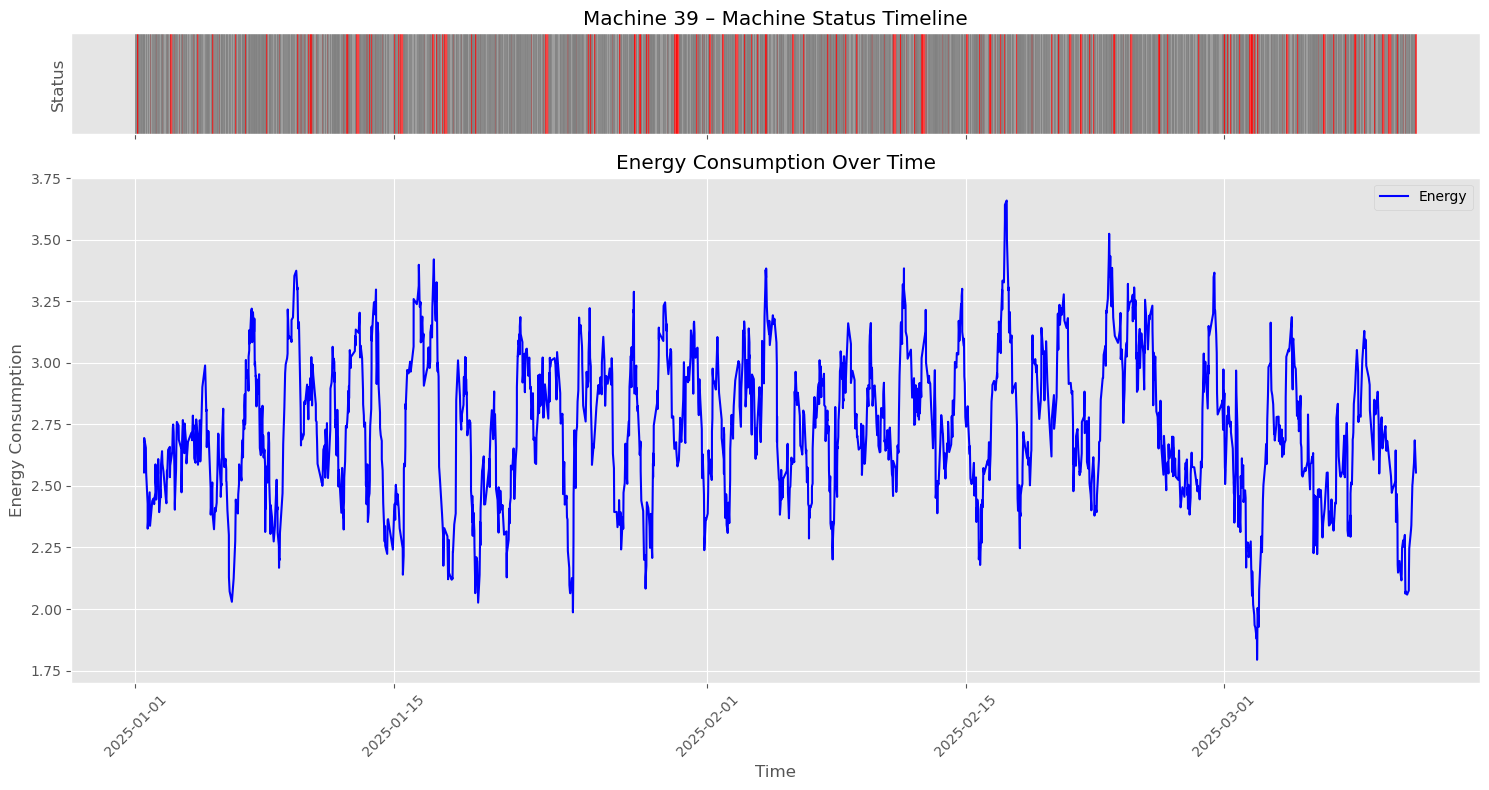

In [92]:
# === 5. Machine Status as Timeline Stripe ===
status_colors = {0: 'gray', 1: 'gray', 2: 'red'}

fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True, gridspec_kw={'height_ratios': [0.2, 1]})

# Status stripe
for i in range(len(machine_df) - 1):
    start = machine_df.index[i]
    end = machine_df.index[i + 1]
    status = machine_df['machine_status'].iloc[i]
    ax[0].axvspan(start, end, color=status_colors[status], alpha=0.7)

ax[0].set_yticks([])
ax[0].set_title(f"Machine {machine_id} – Machine Status Timeline")
ax[0].set_ylabel("Status")
ax[0].grid(False)

# Energy trend
ax[1].plot(machine_df.index, machine_df['energy_consumption'].rolling(window=20).mean(), label='Energy', color='blue')
ax[1].set_title("Energy Consumption Over Time")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Energy Consumption")
ax[1].legend()
ax[1].grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



🚨 Warning Events: 7978


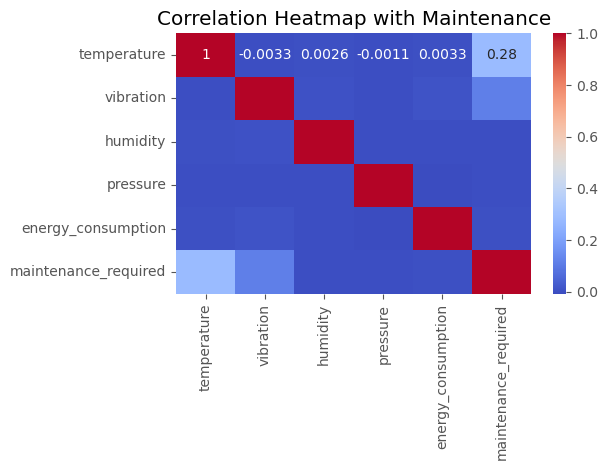

In [64]:
# === 6. Warning Flags (Optional Logic) ===
df['warning_flag'] = ((df['vibration'] > 50) & (df['temperature'] > 85)).astype(int)
print("🚨 Warning Events:", df['warning_flag'].sum())

# === 7. Heatmap Correlation (All Machines) ===
metrics = ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']
corr = df[metrics + ['maintenance_required']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Maintenance")
plt.tight_layout()
plt.show()



In [65]:
# === 8. Failure Frequency per Machine ===
fail_freq = df[df['failure_type'] != 'Normal'].groupby('machine_id')['failure_type'].value_counts().unstack().fillna(0)
display(fail_freq.sort_index())

# === 9. Save Key Plots (Optional) ===
# plt.savefig("machine_39_trends.png", dpi=300)

# === 10. To-Do Next ===
# ☐ Automate plot generation per machine
# ☐ Add anomaly detection (e.g. Z-score)
# ☐ Export warning_flag rows for alerts

failure_type,Electrical Fault,Overheating,Pressure Drop,Vibration Issue
machine_id,,,,
1,20,37,41,58
2,13,45,43,73
3,17,41,51,62
4,16,39,52,40
5,23,40,42,68
6,22,41,41,65
7,21,39,41,57
8,22,38,29,65
9,27,45,40,68


# --- Visualize Sensor Trends (First 3 Sensors) ---

In [21]:

sensor_cols = [col for col in df.columns][1:6]


print("Sensor columns:", sensor_cols)


Sensor columns: ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


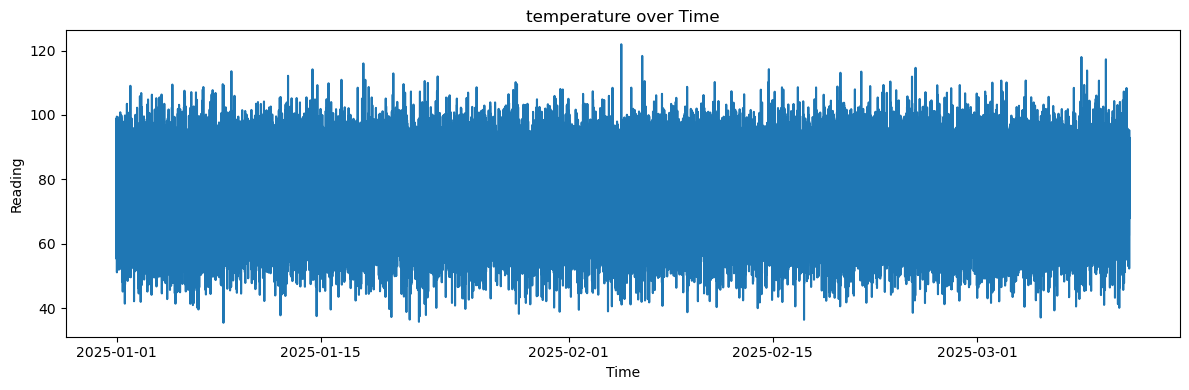

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


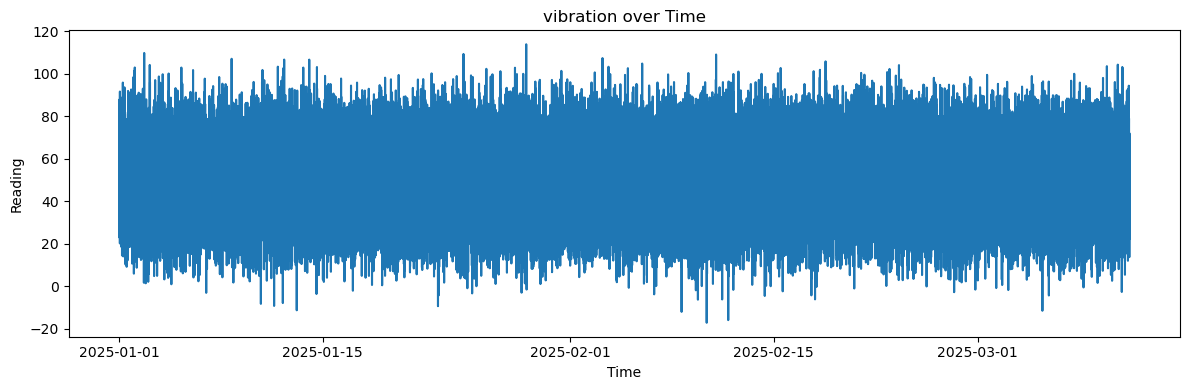

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


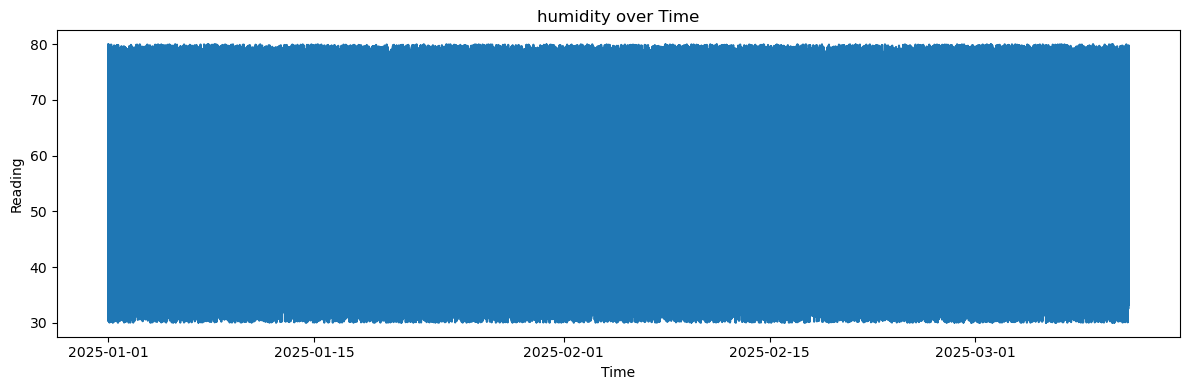

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


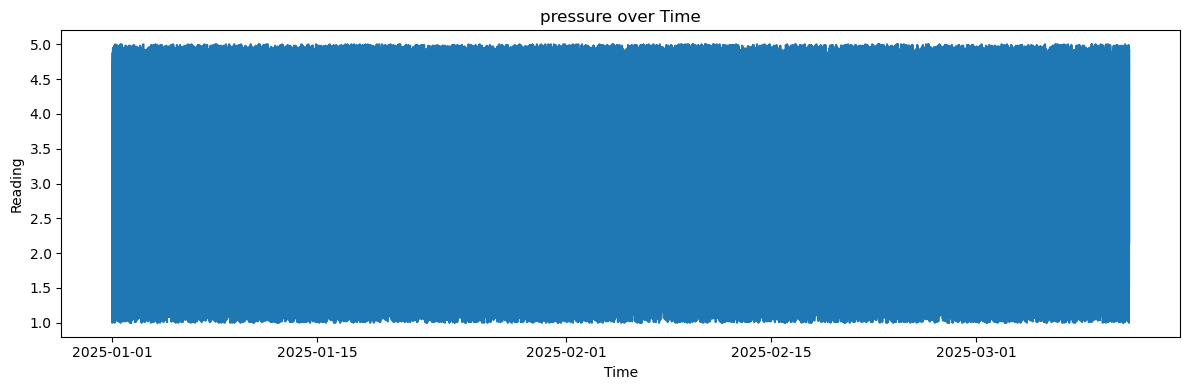

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


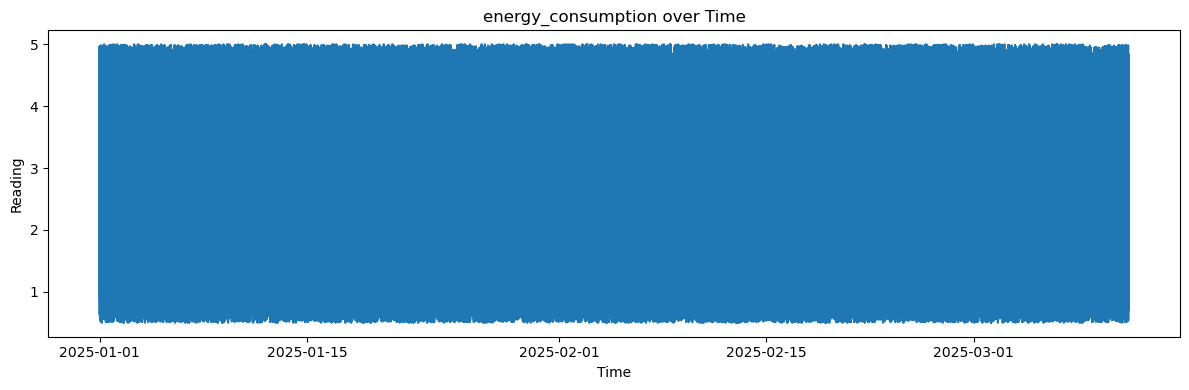

In [22]:
for col in sensor_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x=df.index, y=col, hue='status' if 'status' in df.columns else None)
    plt.title(f"{col} over Time")
    plt.xlabel("Time")
    plt.ylabel("Reading")
    plt.tight_layout()
    plt.show()

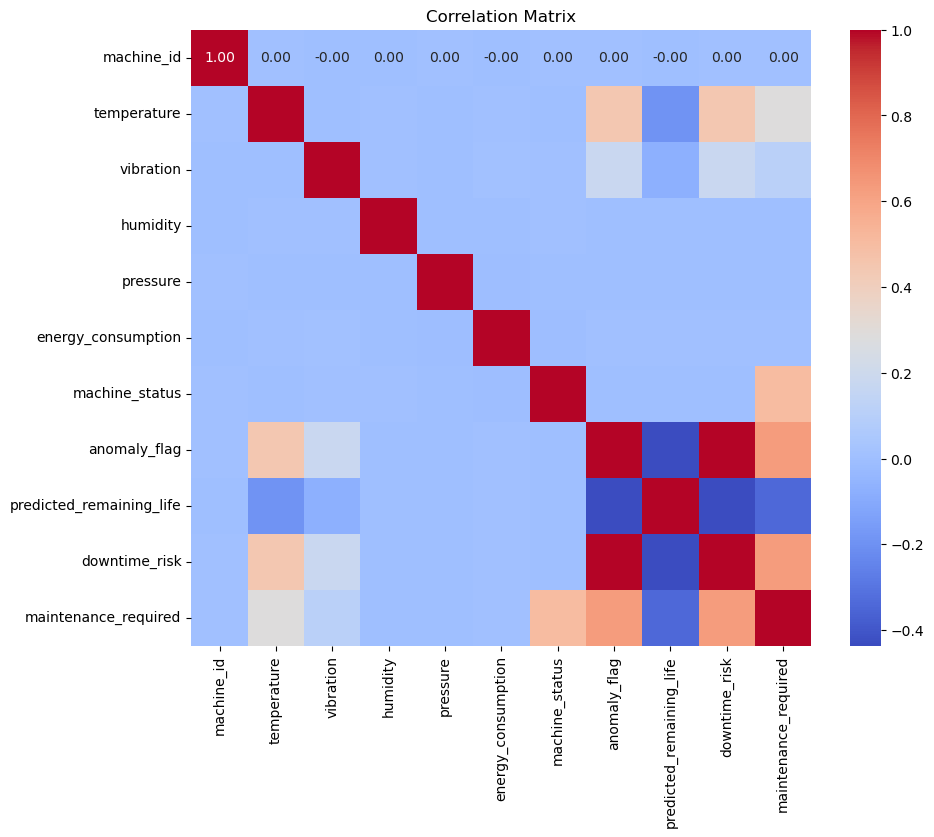

In [16]:
# --- Correlation Heatmap (Optional) ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


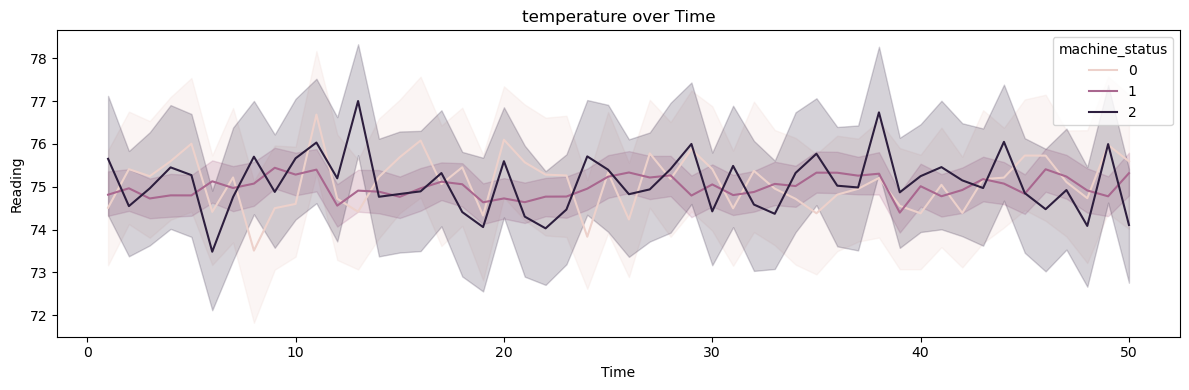

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


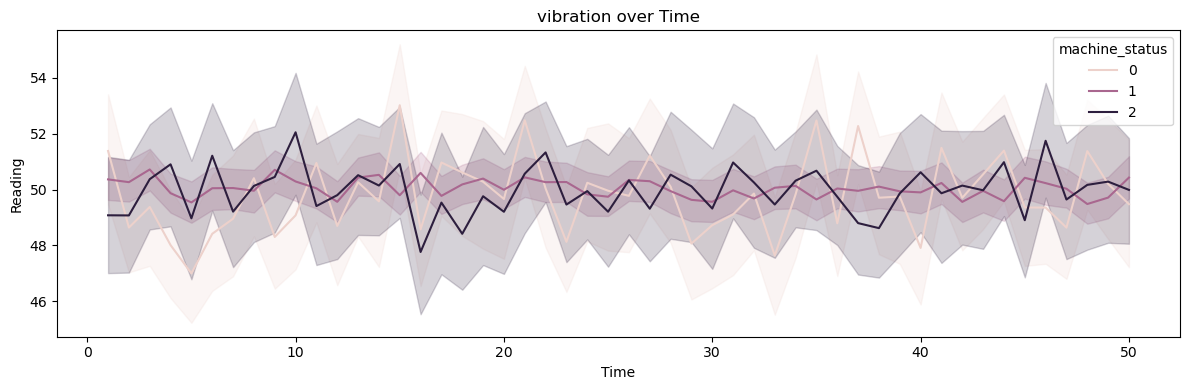

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


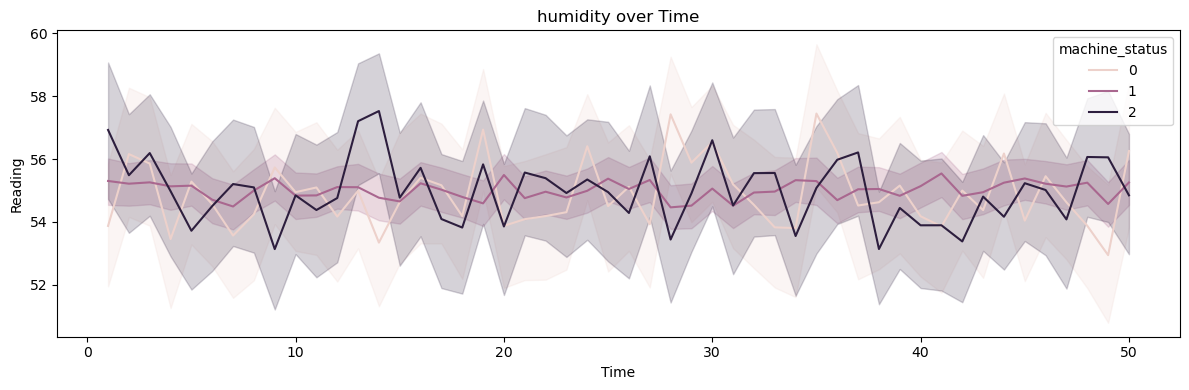

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


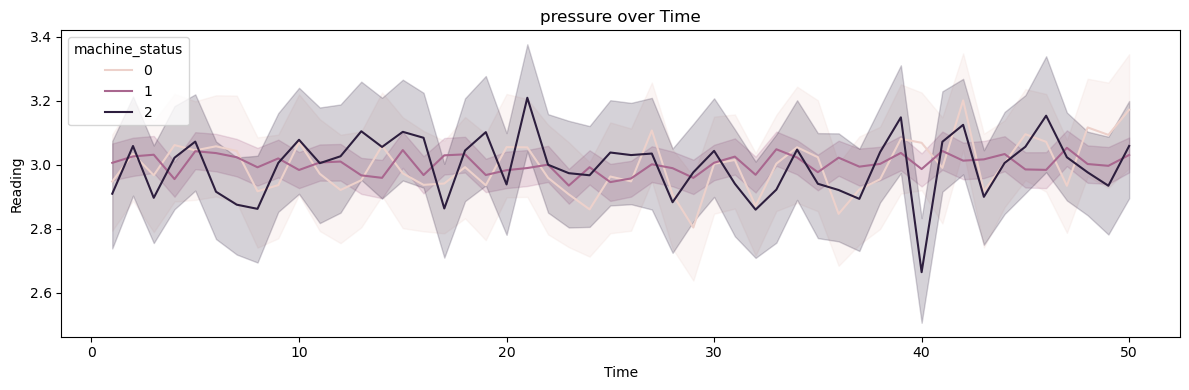

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


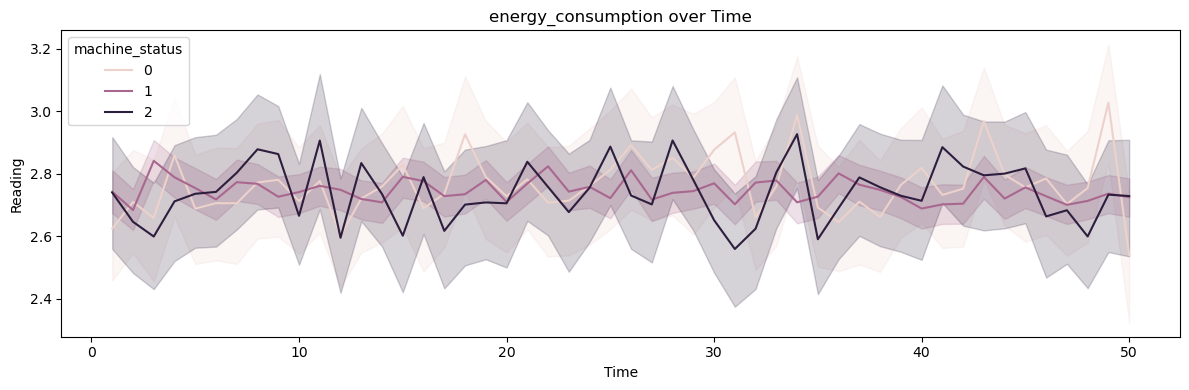

In [23]:
# machine_status	anomaly_flag	predicted_remaining_life	downtime_risk	maintenance_required
for col in sensor_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x=df.machine_id, y=col, hue='machine_status' if 'machine_status' in df.columns else None)
    plt.title(f"{col} over Machine ID")
    plt.xlabel("Machine ID")
    plt.ylabel("Reading")
    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


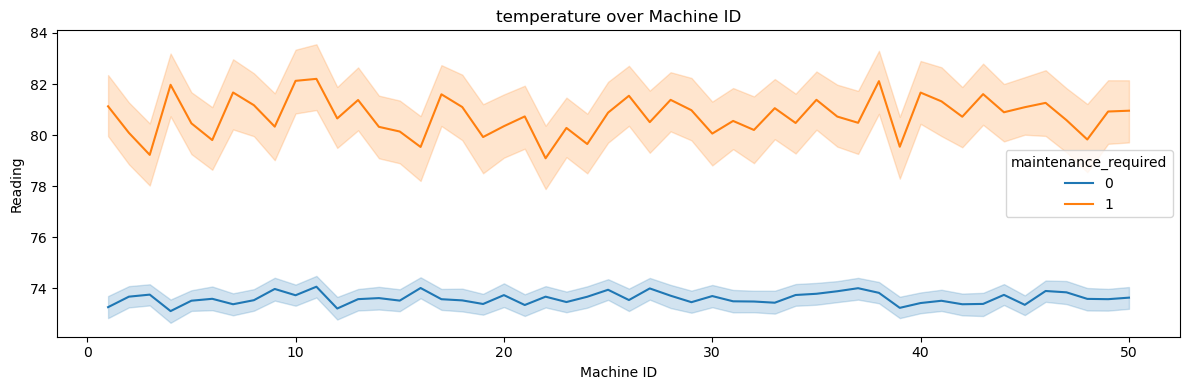

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


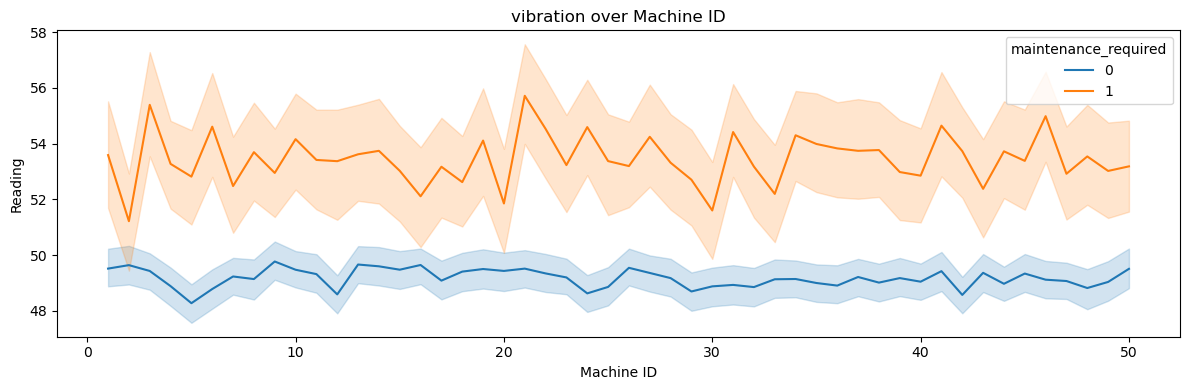

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


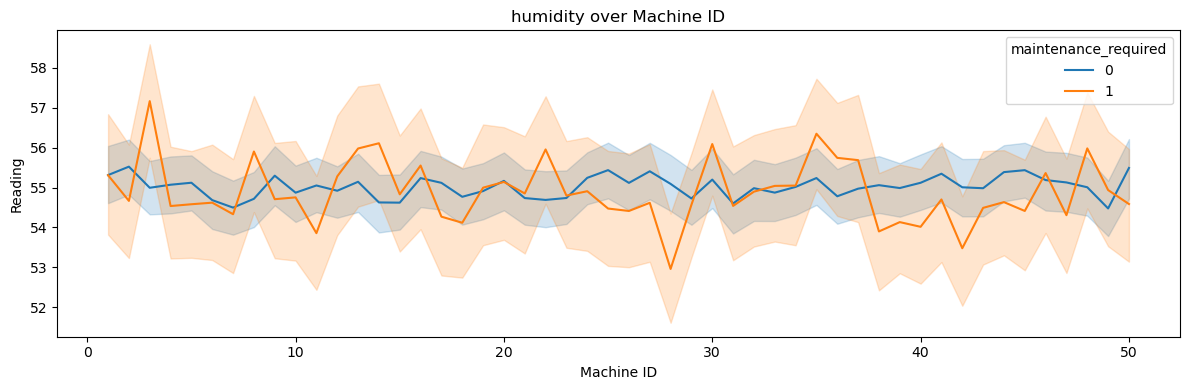

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


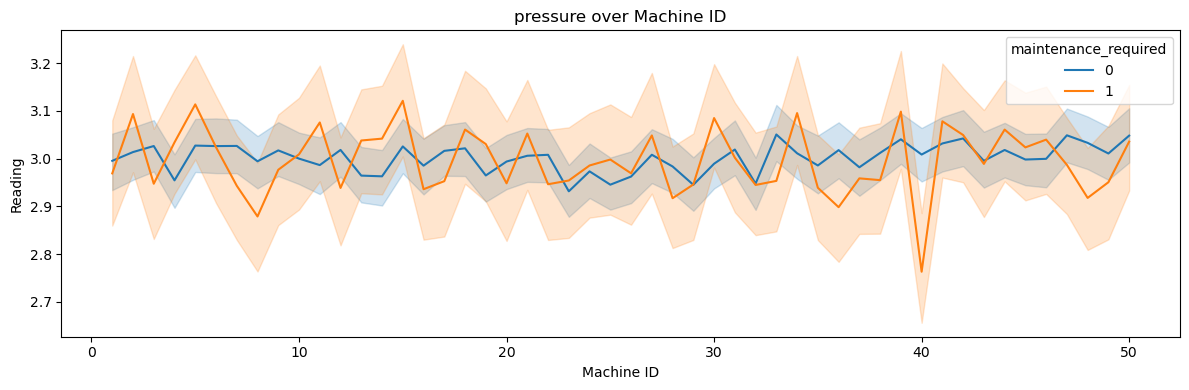

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


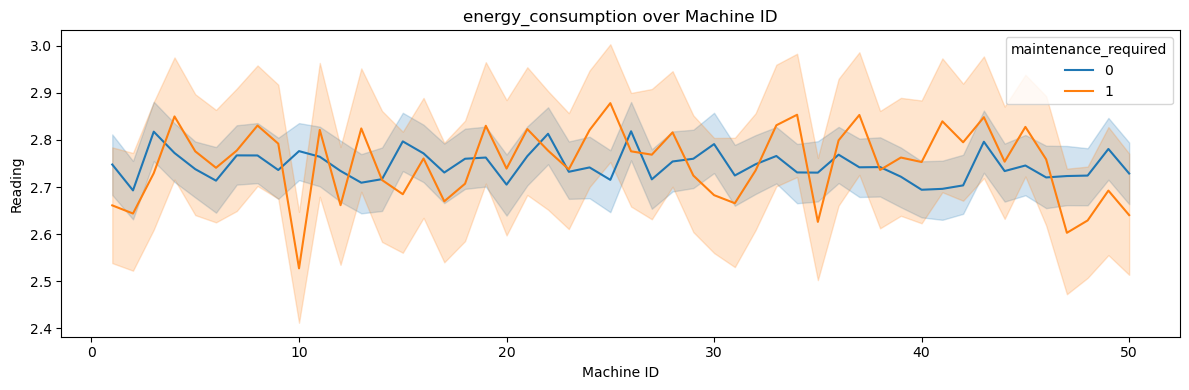

In [26]:
# machine_status	anomaly_flag	predicted_remaining_life	downtime_risk	maintenance_required
for col in sensor_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x=df.machine_id, y=col, hue='maintenance_required')
    plt.title(f"{col} over Machine ID")
    plt.xlabel("Machine ID")
    plt.ylabel("Reading")
    plt.tight_layout()
    plt.show()